In [1]:
## Import the necessary libraries
import pandas as pd
import numpy as np


## 1 - Loading the data and Initial checks (EDA)

In [2]:
df = pd.read_excel('Real estate valuation data set.xlsx')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


#### Observations
- it looks like the headers name having spaces and that migh be a bit difficult to us to handle the features, so will replace the spaces with underscore_

In [3]:
# Rename columns to replace spaces with underscores
df.columns = df.columns.str.replace(' ', '_')
df.head()

,No,X1_transaction_date,X2_house_age,X3_distance_to_the_nearest_MRT_station,X4_number_of_convenience_stores,X5_latitude,X6_longitude,Y_house_price_of_unit_area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


now, looks fine for us!

In [4]:
# print the data shape
print(f" The data have {df.shape[0]} rows and {df.shape[1]} columsn" )

 The data have 414 rows and 8 columsn


In [5]:
# print the data types and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1_transaction_date                     414 non-null    float64
 2   X2_house_age                            414 non-null    float64
 3   X3_distance_to_the_nearest_MRT_station  414 non-null    float64
 4   X4_number_of_convenience_stores         414 non-null    int64  
 5   X5_latitude                             414 non-null    float64
 6   X6_longitude                            414 non-null    float64
 7   Y_house_price_of_unit_area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


The data seems having no missing values and mainly numerical values having below Dtypes:
- float64(6)
- int64(2)
- Trasaction date needs to be converted to datetime format

In [6]:
## let's explore the transaction date format

df['X1_transaction_date'].head()

0    2012.916667
1    2012.916667
2    2013.583333
3    2013.500000
4    2012.833333
Name: X1_transaction_date, dtype: float64

### Observations
looks like te date format incude the 4 digits represent the year and dicemals represent the fraction of the year, so my approach to handel that will be using features extraction techniques as under: 

- 1- Extract the Year using the integer part of the value, the first 4 digits
- 2- Convert the fractional part to months and days.
- 3- apply the same to the transaction date column to get the datetime format
- 4- extract year, month and day as additional columns
- 5- so, in this case i will build below function:

In [7]:
from datetime import datetime, timedelta


# Define the function to convert fractional year to datetime


def fractional_year_to_datetime(fractional_year):
    year = int(fractional_year)   # to extract the integer part as the year which before decimals
    fraction = fractional_year - year  # store the fractions of the year which after the decimals
    
# now will calculate the number of days in the year
    
    start_of_year = datetime(year, 1, 1)  # defining the start of the year
    days_in_year = (datetime(year + 1, 1, 1) - start_of_year).days  # to calculate the nuber of days in the year
    
# Convert the fractional part to days
    days = int(fraction * days_in_year)
    date = start_of_year + timedelta(days=days)  # Add calculated days to the start of the year to get final date
    return date

# Apply the function to convert the transaction date column
df['X1_transaction_date'] = df['X1_transaction_date'].apply(fractional_year_to_datetime)

# Extract the year and month as separate columns
df['Year'] = df['X1_transaction_date'].dt.year
df['Month'] = df['X1_transaction_date'].dt.month
df['Day'] = df['X1_transaction_date'].dt.day




In [8]:
# check the data heads again
df. head()

,No,X1_transaction_date,X2_house_age,X3_distance_to_the_nearest_MRT_station,X4_number_of_convenience_stores,X5_latitude,X6_longitude,Y_house_price_of_unit_area,Year,Month,Day
0,1,2012-12-01,32.0,84.87882,10,24.98298,121.54024,37.9,2012,12,1
1,2,2012-12-01,19.5,306.59470,9,24.98034,121.53951,42.2,2012,12,1
2,3,2013-08-01,13.3,561.98450,5,24.98746,121.54391,47.3,2013,8,1
3,4,2013-07-02,13.3,561.98450,5,24.98746,121.54391,54.8,2013,7,2
4,5,2012-10-31,5.0,390.56840,5,24.97937,121.54245,43.1,2012,10,31


In [9]:
df.tail()

,No,X1_transaction_date,X2_house_age,X3_distance_to_the_nearest_MRT_station,X4_number_of_convenience_stores,X5_latitude,X6_longitude,Y_house_price_of_unit_area,Year,Month,Day
409,410,2013-01-01,13.7,4082.01500,0,24.94155,121.50381,15.4,2013,1,1
410,411,2012-09-01,5.6,90.45606,9,24.97433,121.54310,50.0,2012,9,1
411,412,2013-04-02,18.8,390.96960,7,24.97923,121.53986,40.6,2013,4,2
412,413,2013-01-01,8.1,104.81010,5,24.96674,121.54067,52.5,2013,1,1
413,414,2013-07-02,6.5,90.45606,9,24.97433,121.54310,63.9,2013,7,2


In [10]:
# print the data shape again ()
print(f" The data have {df.shape[0]} rows and {df.shape[1]} columsn" )

 The data have 414 rows and 11 columsn


In [11]:
## check the data info more one time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   No                                      414 non-null    int64         
 1   X1_transaction_date                     414 non-null    datetime64[ns]
 2   X2_house_age                            414 non-null    float64       
 3   X3_distance_to_the_nearest_MRT_station  414 non-null    float64       
 4   X4_number_of_convenience_stores         414 non-null    int64         
 5   X5_latitude                             414 non-null    float64       
 6   X6_longitude                            414 non-null    float64       
 7   Y_house_price_of_unit_area              414 non-null    float64       
 8   Year                                    414 non-null    int64         
 9   Month                                   414 non-null  

Looks fine!

In [12]:
## check the nulls 
df.isnull().sum()

No                                        0
X1_transaction_date                       0
X2_house_age                              0
X3_distance_to_the_nearest_MRT_station    0
X4_number_of_convenience_stores           0
X5_latitude                               0
X6_longitude                              0
Y_house_price_of_unit_area                0
Year                                      0
Month                                     0
Day                                       0
dtype: int64

In [13]:
# let's check the data summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
No,414.0,207.500000,119.655756,1.00000,104.250000,207.50000,310.750000,414.00000
X2_house_age,414.0,17.712560,11.392485,0.00000,9.025000,16.10000,28.150000,43.80000
X3_distance_to_the_nearest_MRT_station,414.0,1083.885689,1262.109595,23.38284,289.324800,492.23130,1454.279000,6488.02100
X4_number_of_convenience_stores,414.0,4.094203,2.945562,0.00000,1.000000,4.00000,6.000000,10.00000
X5_latitude,414.0,24.969030,0.012410,24.93207,24.963000,24.97110,24.977455,25.01459
X6_longitude,414.0,121.533361,0.015347,121.47353,121.528085,121.53863,121.543305,121.56627
Y_house_price_of_unit_area,414.0,37.980193,13.606488,7.60000,27.700000,38.45000,46.600000,117.50000
Year,414.0,2012.695652,0.460687,2012.00000,2012.000000,2013.00000,2013.000000,2013.00000
Month,414.0,6.253623,3.448118,1.00000,4.000000,6.00000,9.000000,12.00000
Day,414.0,7.041063,11.475028,1.00000,1.000000,2.00000,2.000000,31.00000


#### Observations
- X2_house_age: Mean: 17.71 years, Range: 0 to 43.8 years, Std: 11.39. The wide range and standard deviation indicate varied property ages.

- X3_distance_to_the_nearest_MRT_station: Mean: 1083.89 m, Range: 23.38 to 6488.02 meters, Std: 1262.11. there is large standard variation in accessibility, potential of outliers 

- X4_number_of_convenience_stores: Mean: 4.09 stores, Range: 0 to 10 stores, Std: 2.95.

- X5_latitude: Mean: 24.969 degrees, Range: 24.93207 to 25.01459 degrees, Std: 0.01241. range suggests a limited geographical spread.

- X6_longitude: Mean: 121.533 degrees, Range: 121.47353 to 121.56627 degrees, Std: 0.01535. Similar to latitude, the narrow range indicates limited geographical spread. 

- Y_house_price_of_unit_area: Mean: 37.98 , Range: 7.6 to 117.5, Std: 13.61. there is a price variations

- Year: Data ranges from 2012 to 2013, Mean: 2012.70. 2 years range

### let's do our EDA

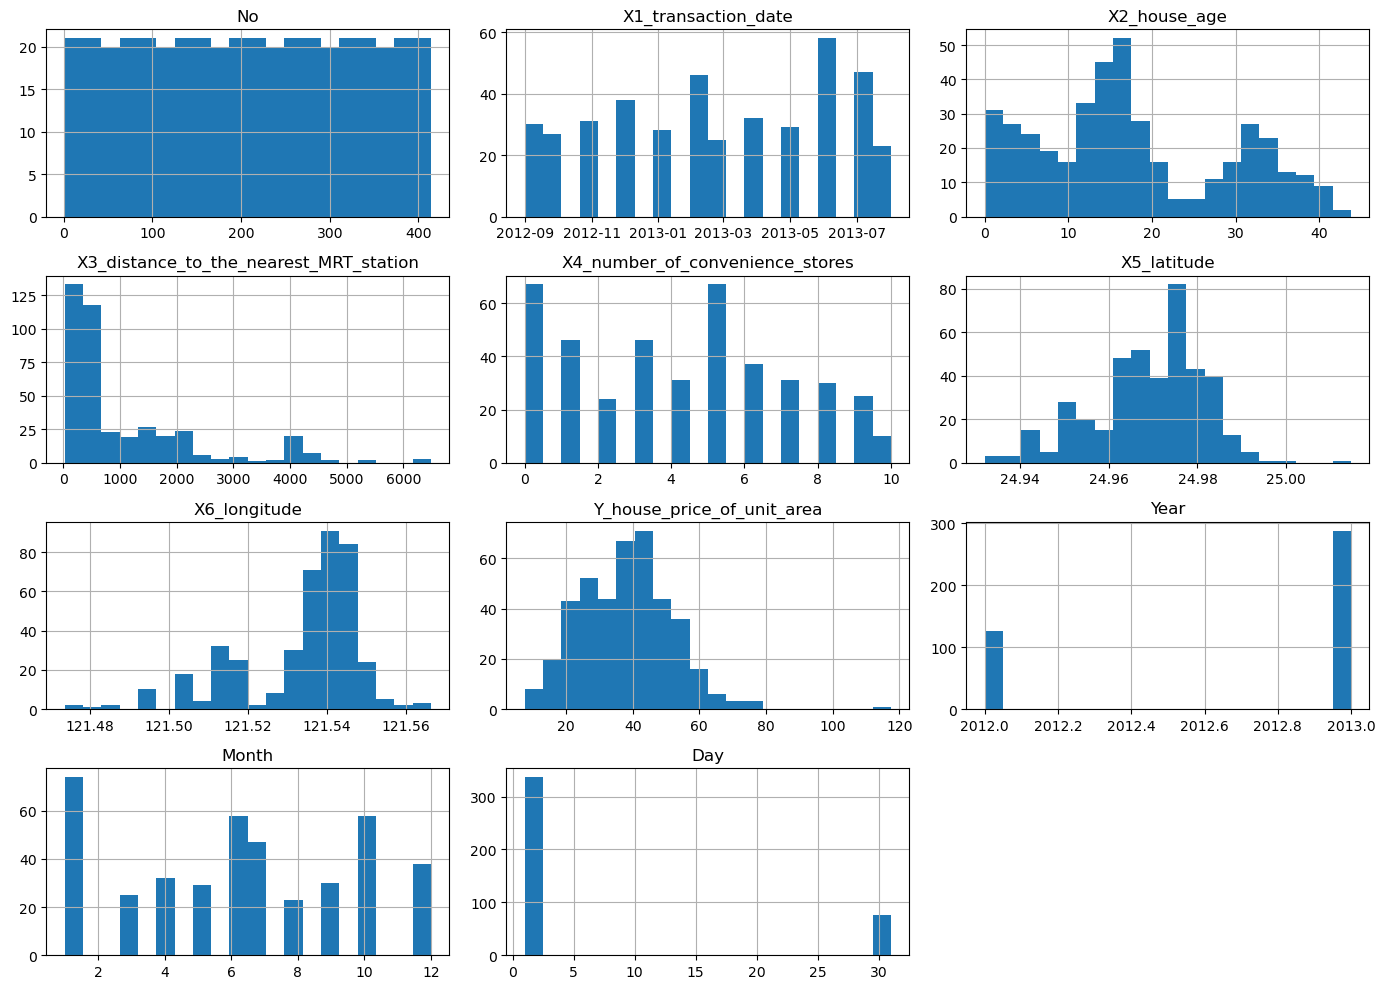

In [14]:
## let's check the data distribution ( histogram & box plot)

import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical columns
df.hist(bins=20, figsize=(14, 10))
plt.tight_layout()
plt.show()


### Observations

- Date: dates shows some periodic spikes, indicating that some months have higher transactions counts. will check that later using line plot.

- House_age: there are variations in house age but looks like most of houses are between 10 and 20 years old.

- distance to MRT station: there is right skewed distribution with most houses being closer to MRT stations.suggest some outliers on the higher side.

- number stores:  number of stores varies,however, some counts are common among places.

- X5_latitude & X6_longitude: both are in a narrow range, with some peak around a specific value.needs more analysis to understand the correlation between prices and these areas

- house_price_of_unit_area: The house prices show kind of normal distribution, with some peak around the center values.


- in Months: some months showing higher counts.such as January, june and october.

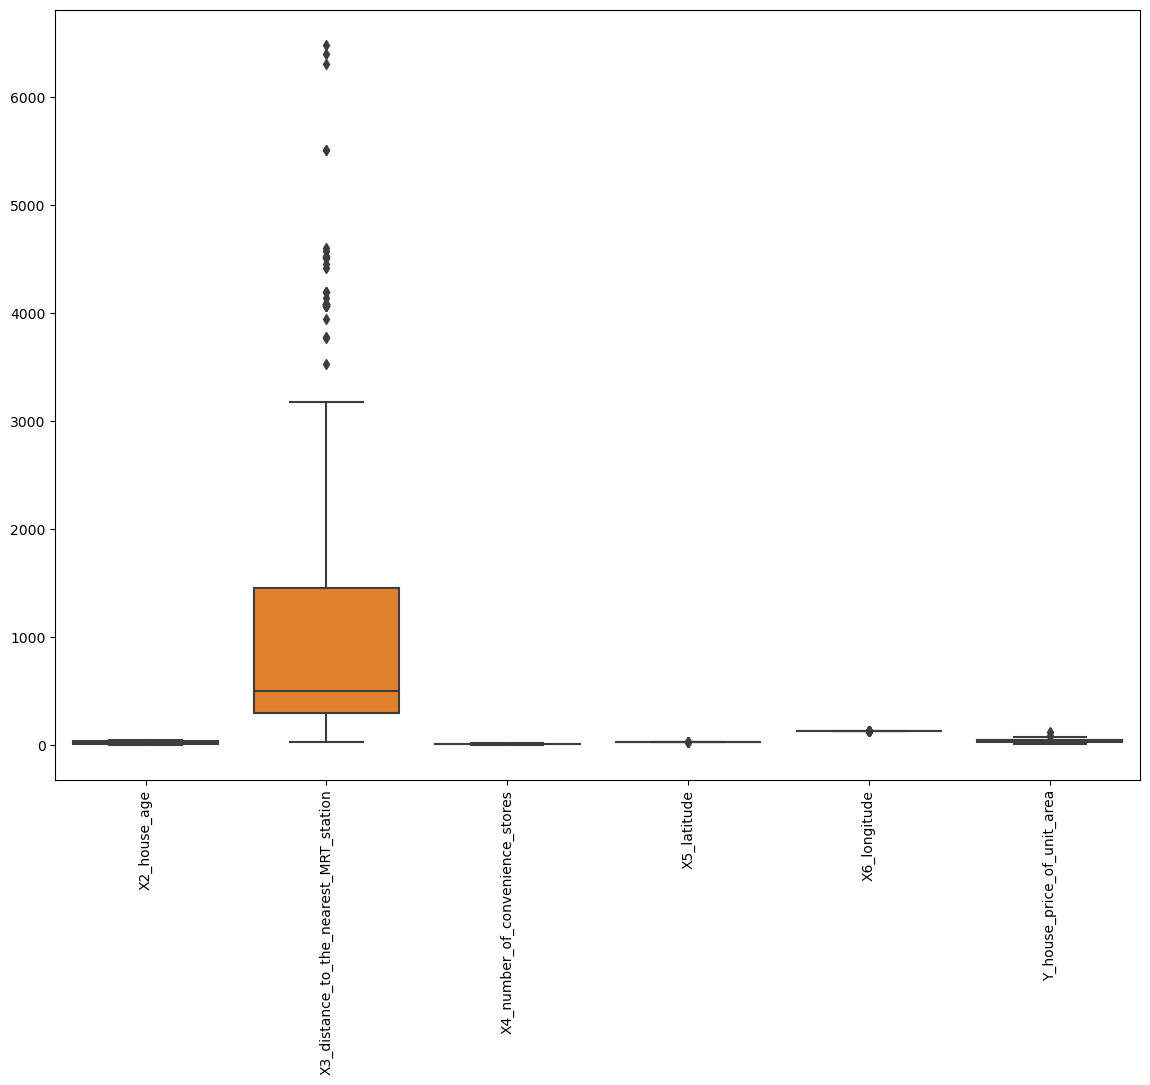

In [15]:
# let's do box plots for numerical columns
plt.figure(figsize=(14, 10))
sns.boxplot(data=df[['X2_house_age', 'X3_distance_to_the_nearest_MRT_station', 
                     'X4_number_of_convenience_stores', 'X5_latitude', 'X6_longitude', 
                     'Y_house_price_of_unit_area']])
plt.xticks(rotation=90)
plt.show()

### Observations:

- all the features seems that having minimal outliers and distributions are compact, except for distance to the nearest MRT station which evident that the distance has a significant number of outliers compared to other variables, which might influence our analysis and need to be handeled.

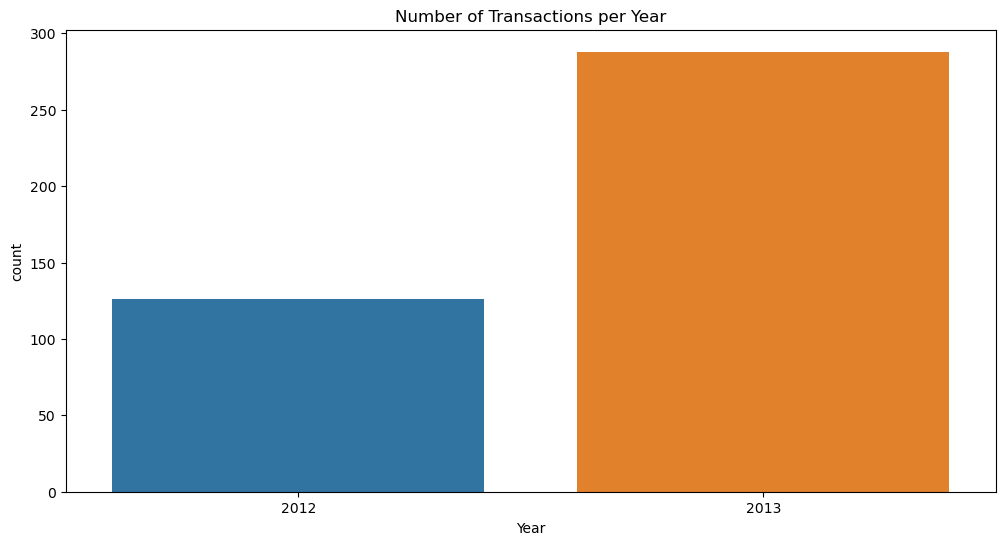

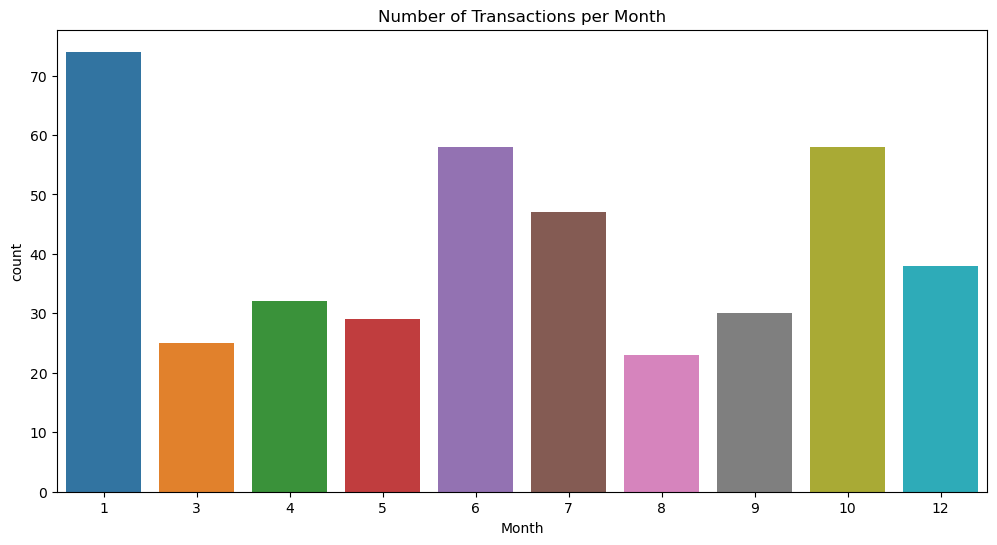

In [16]:
# now let's analyze distribution of transactions over time
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=df)
plt.title('Number of Transactions per Year')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Month', data=df)
plt.title('Number of Transactions per Month')
plt.show()

#### Observations
- as we observed earlier that transactions in year 2013 is more than year 2012
- there is a peak in transaction of months Jan, June and october, where decline in months such as Mar,Aug

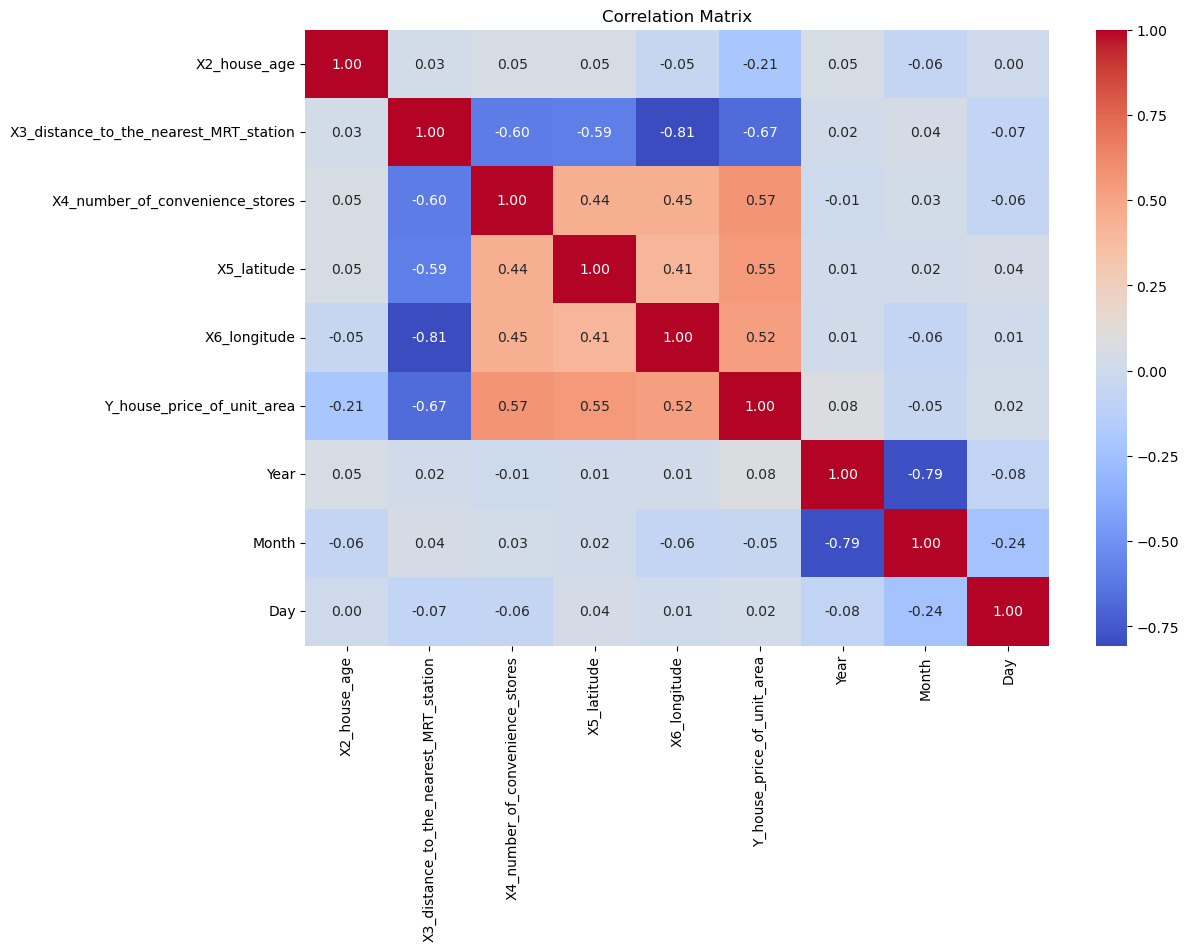

In [17]:
# Correlation matrix
corr_matrix = df[['X2_house_age', 'X3_distance_to_the_nearest_MRT_station', 
                     'X4_number_of_convenience_stores', 'X5_latitude', 'X6_longitude', 
                     'Y_house_price_of_unit_area', 'Year', 'Month','Day']].corr()

# Heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#### Observations: 

-  The distance to the_nearest_MRT_station: has strong negative correlation with longitude @ (-0.81) and moderate negative correlation with price @ (-0.67, indicates that houses closer to MRT stations are more expensive. this could be important feature in our model. 

- number of stores: has a moderate positive correlation with price @ 0.57 which idicates that the more number of stores near a house the more expensive is a house. 

- latitude & longitude: both have moderate positive correlation with the price @ 0.55 & 0.52 resp. which indicating that longitude and latitude, affects house prices. this is could be also important feature in mour model


- for Year and Month:There are strong negative correlations between Year and Month (-0.79). Suggesting that the distribution of transactions varies significantly across months and years due to some of seasonality.

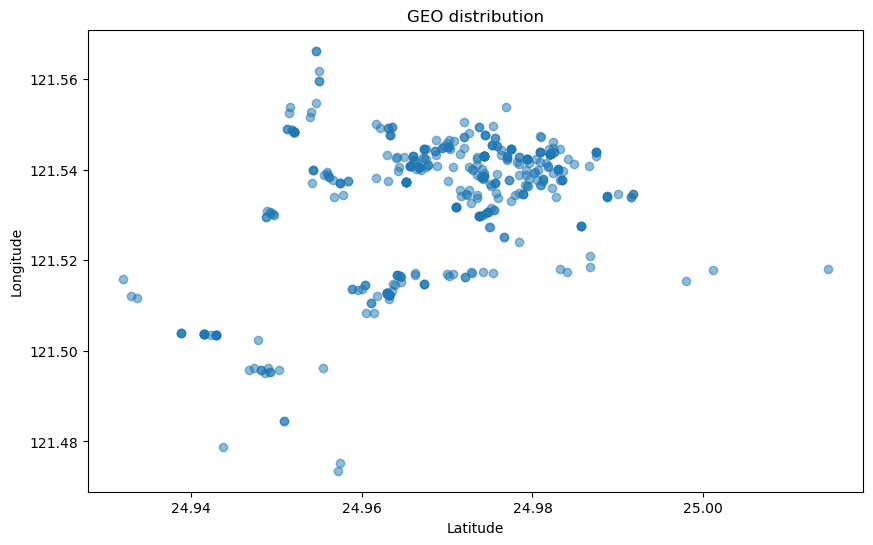

In [18]:
# Scatter plot of latitude and longitude to check the GEO distribution
plt.figure(figsize=(10, 6))
plt.scatter(df['X5_latitude'], df['X6_longitude'], alpha=0.5)
plt.title('GEO distribution')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

#### Observations:

From the graph above, we can see that there is a cluster of data points centered around latitude 24.96 and 24.98 and longitude 121.54. This indicates that most of the homes are located in this area of this country or region.

There are also fewer data points on the edges around this cluster, especially on the high side of the latitudes and low longitudes, indicating that transactions and aminities are lower in these areas.

However, there are some data points further away from the main cluster towards the low latitudes. This area may represent some outliers or some homes in less developed areas or new areas under construction.

So, I think that since most of the homes are concentrated in one area, it means that transportation and aminities are concentrated in this area, and therefore, these homes are likely to be more expensive the closer we get to the center of this cluster.


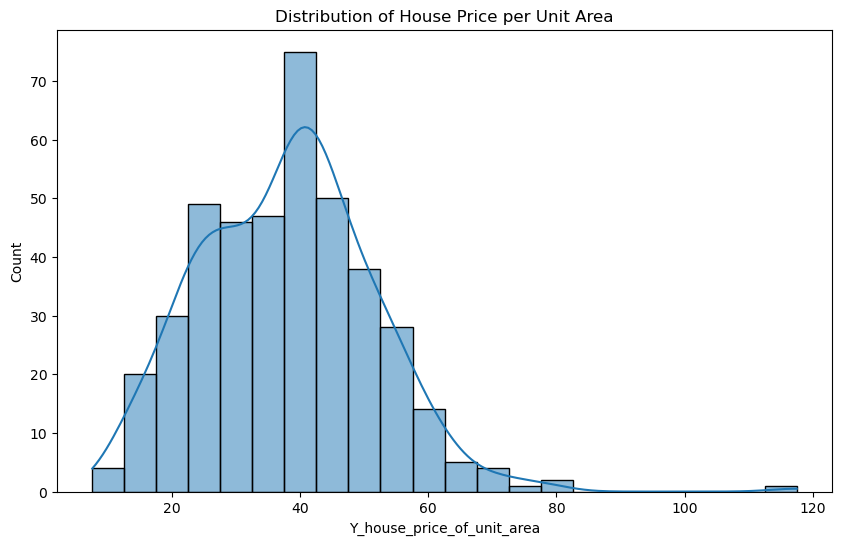

In [19]:
# Now, let's check the Distribution of the price

plt.figure(figsize=(10, 6))
sns.histplot(df['Y_house_price_of_unit_area'], kde=True)
plt.title('Distribution of House Price per Unit Area')
plt.show()



## Observations: 
price distribution has variability of distribution and observed that most houses have a price per unit @ 40 unit.   There is also a range of prices of some houses priced between 20 to 80 units, with some outliers or a right-skewed distribution indicting that some houses have signficant higher price than normal.

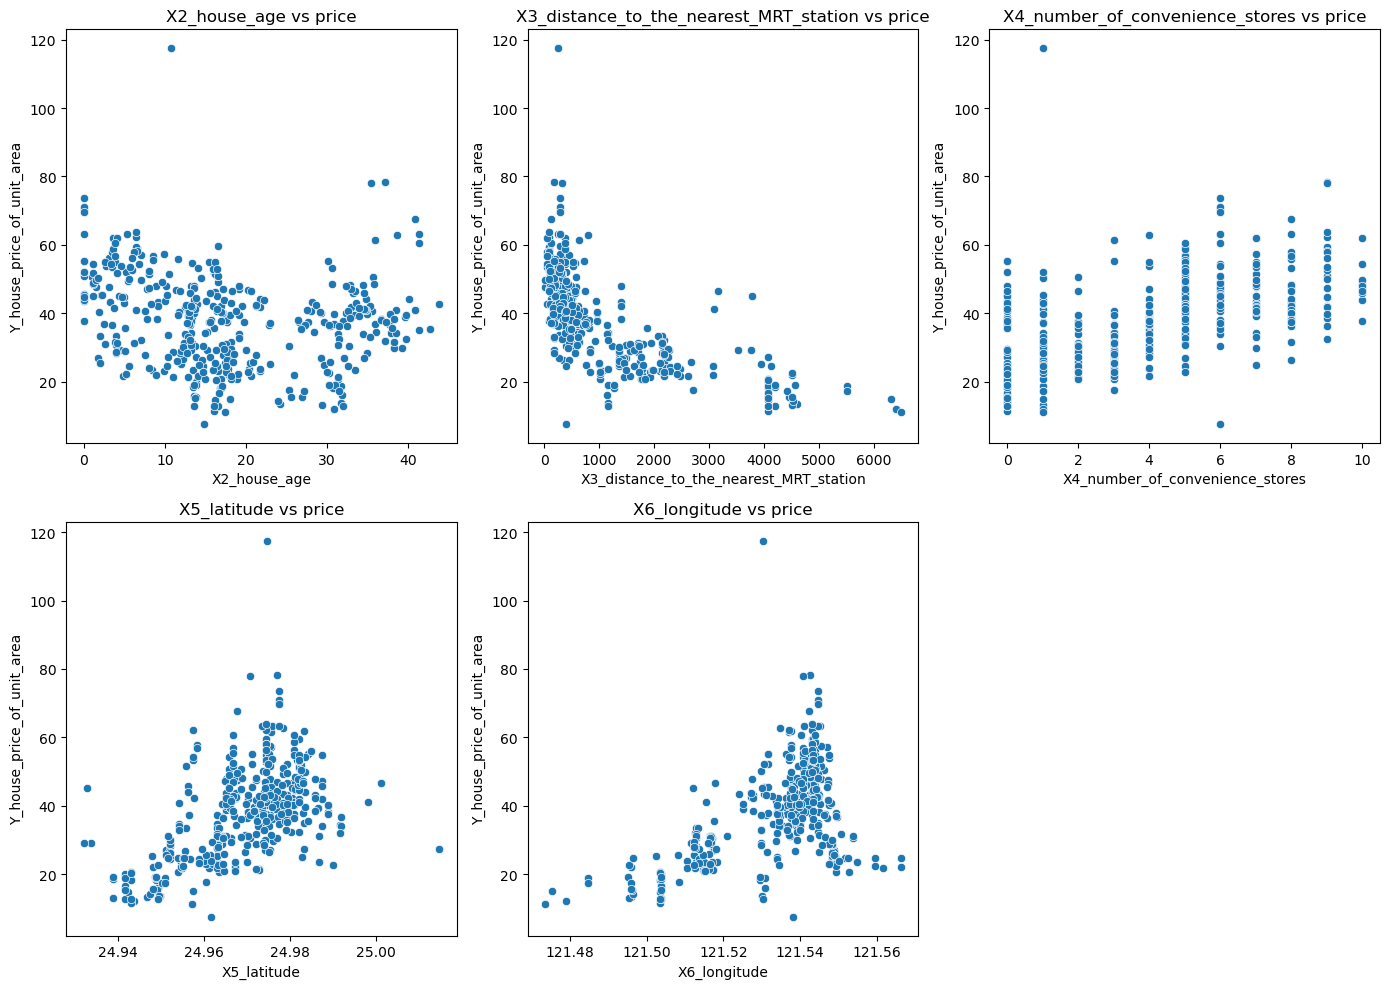

In [20]:
# Scatter plots to analyze the relationship between the price and each numerical feature
numerical_features = ['X2_house_age', 'X3_distance_to_the_nearest_MRT_station', 
                      'X4_number_of_convenience_stores', 'X5_latitude', 'X6_longitude']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[feature], y=df['Y_house_price_of_unit_area'])
    plt.title(f'{feature} vs price')

plt.tight_layout()
plt.show()

#### Observations


There is no clear linear relationship between house age and house price per unit area.
House prices are widely spread for different house ages, suggesting other factors may be influencing the price.

There is a clear negative correlation in distance from MRT st. as house prices tend to decrease with increasing distance from the nearest MRT station.

the House prices tend to be higher where there are more stores. however, a few outliers is there.

the House prices tend to  increase with increasing latitude and lngtitude.

above observations suggest that distance to MRT stations, the number of stores, and the latitude and longitude are the important factors influencing house prices. however, House age seems to have a lesser impact on the price.

## 2- Data Preprocessing

### Removing unwanted columns:
Based on the analysis and EDA we performed, I would suggest removing the following columns:

- 'No': This column is just an index and doesn't provide any useful information for analysis or modeling.
- 'X1_transaction_date': Since we have already extracted 'Year', 'Month', and 'Day' from this column, the original - 'X1_transaction_date' column can be removed.
- 'Year': Considering the data is only from 2012 and 2013, and it shows a strong negative correlation with 'Month', it may not add significant value to the analysis. 

In [21]:
df1 = df.drop(columns=['No', 'X1_transaction_date', 'Year'])
df1.head()

,X2_house_age,X3_distance_to_the_nearest_MRT_station,X4_number_of_convenience_stores,X5_latitude,X6_longitude,Y_house_price_of_unit_area,Month,Day
0,32.0,84.87882,10,24.98298,121.54024,37.9,12,1
1,19.5,306.59470,9,24.98034,121.53951,42.2,12,1
2,13.3,561.98450,5,24.98746,121.54391,47.3,8,1
3,13.3,561.98450,5,24.98746,121.54391,54.8,7,2
4,5.0,390.56840,5,24.97937,121.54245,43.1,10,31


In [22]:
df1.shape

(414, 8)

In [23]:
df1.isnull().sum()

X2_house_age                              0
X3_distance_to_the_nearest_MRT_station    0
X4_number_of_convenience_stores           0
X5_latitude                               0
X6_longitude                              0
Y_house_price_of_unit_area                0
Month                                     0
Day                                       0
dtype: int64

### Treating the outliers:

since we are not sure of the outliers being real numbers or typo as in normal cases we revert to clients in such scenarios.However, i will use below approach to reduce the effect and also do not loose potential imporatnt information by using iqr method


In [24]:
df1.shape

(414, 8)

In [25]:
## First let's check the skewness of the features in the dataset
skewness = df1[['X2_house_age', 'X3_distance_to_the_nearest_MRT_station', 'X4_number_of_convenience_stores', 'X5_latitude', 'X6_longitude', 'Month', 'Day']].skew()
print("Skewness of numerical features:")
print(skewness)

Skewness of numerical features:
X2_house_age                              0.382926
X3_distance_to_the_nearest_MRT_station    1.888757
X4_number_of_convenience_stores           0.154607
X5_latitude                              -0.438598
X6_longitude                             -1.219591
Month                                    -0.058868
Day                                       1.614009
dtype: float64


<Axes: >

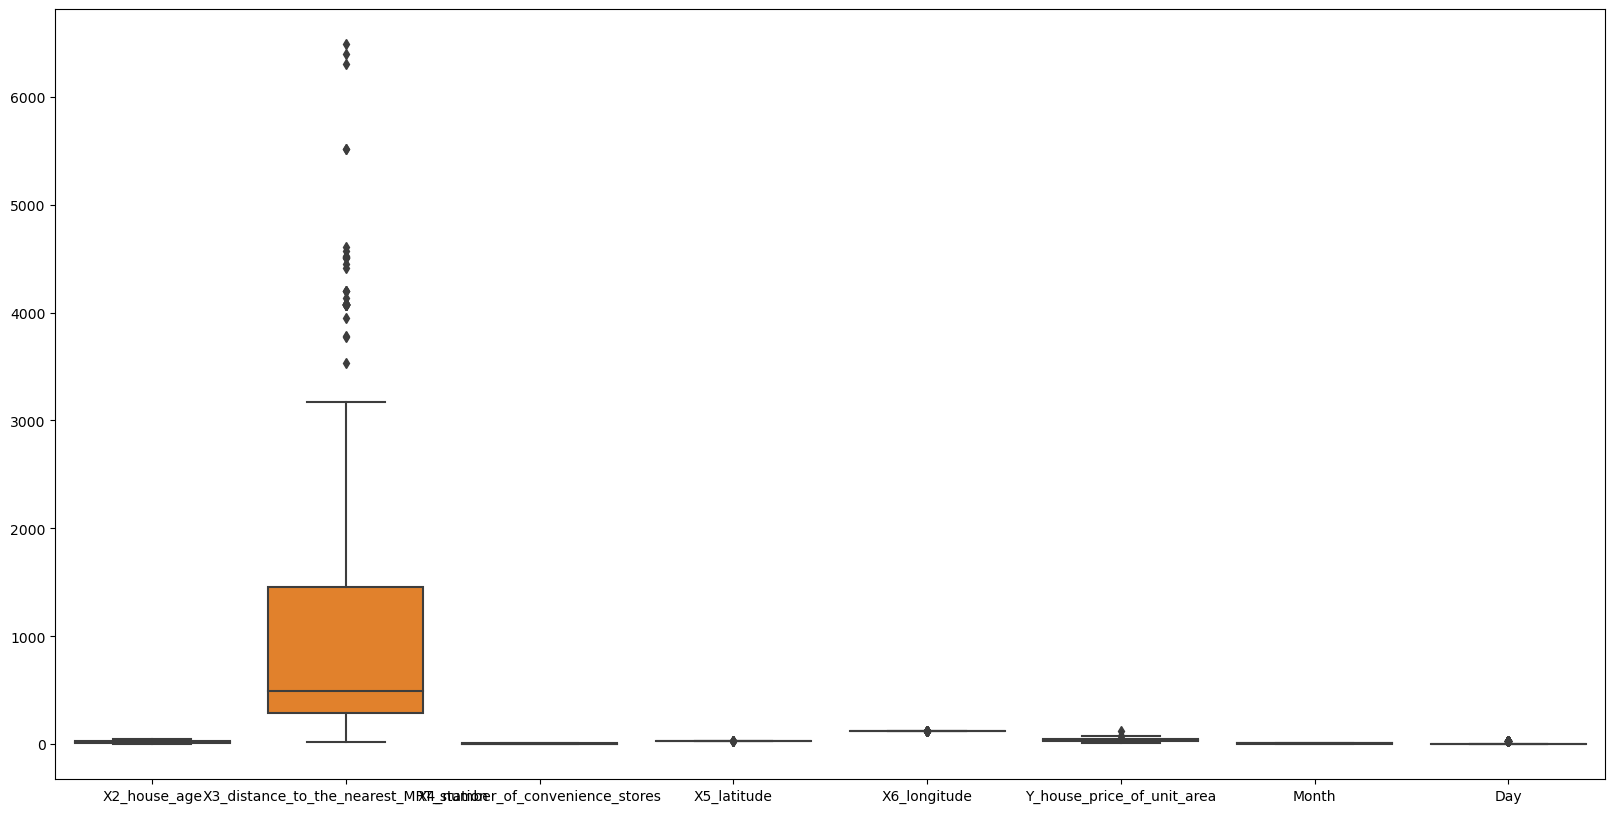

In [26]:
# let's check the outliers in box plot as well
plt.figure(figsize=(20,10))
sns.boxplot(df1)


In [27]:
# using IQR method to reduce outlier
# Calculate IQR
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1


In [28]:
# Define the lower and upper limits for each feature
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR


In [29]:
# Create a copy of the original dataframe and remove the outliers

df1_no_outliers = df1.copy()  


for column in df1.columns:
    
    df1_no_outliers = df1_no_outliers[
        (df1_no_outliers[column] >= lower_limit[column]) &
        (df1_no_outliers[column] <= upper_limit[column])
    ]
print(f"Shape of data after removing outliers using IQR method: {df1_no_outliers.shape}")
print("Skewness of transformed features:\n", df1_no_outliers.skew())

Shape of data after removing outliers using IQR method: (298, 8)
Skewness of transformed features:
 X2_house_age                              0.405717
X3_distance_to_the_nearest_MRT_station    1.237533
X4_number_of_convenience_stores          -0.009948
X5_latitude                              -0.208522
X6_longitude                             -1.043570
Y_house_price_of_unit_area                0.159259
Month                                     0.095528
Day                                      -0.286164
dtype: float64


#### key comparsion between skewness before and after IQR method

distance_to_the_nearest_MRT_station:
- Before: 1.888757
- After: 1.237533
- Significant reduction in skewness, indicating a more normal distribution.

X4_number_of_convenience_stores:
- Before: 0.154607
- After: -0.009948
- Change from positive to slightly negative skewness, which moving to a more balanced distribution.

X5_latitude:
- Before: -0.438598
- After: -0.208522
- Reduction in skewness, indicating a more normal distribution.

X6_longitude:
- Before: -1.219591
- After: -1.043570
- Reduction in skewness, showing less extreme values and a more balanced data.

Y_house_price_of_unit_area:
- Before: 0.599853
- After: 0.159259
- Significant reduction in skewness, indicating a more normal distribution.


<Axes: >

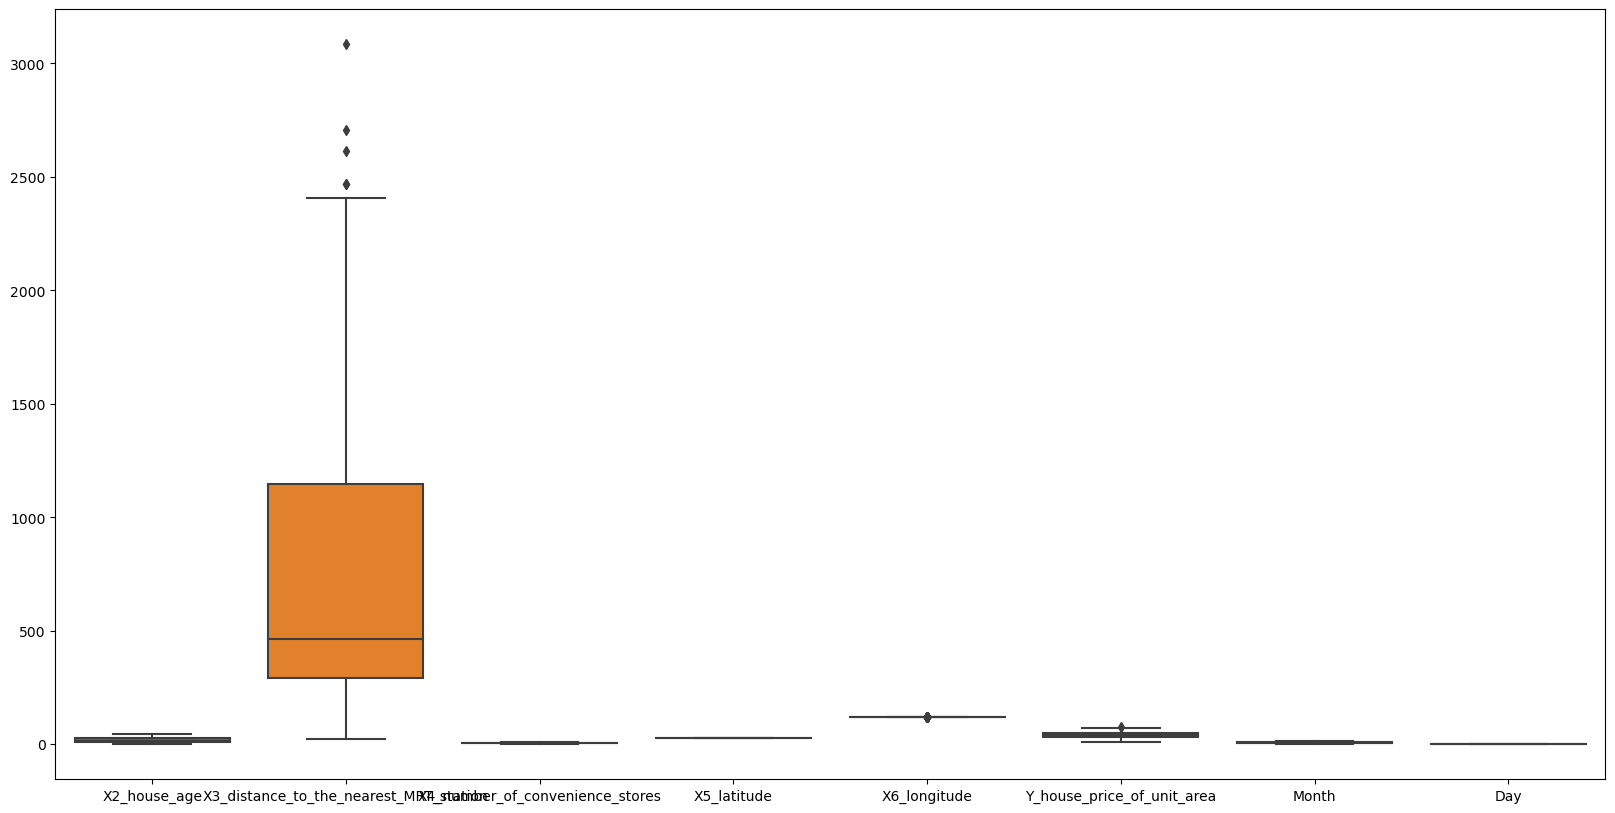

In [30]:
# let's check also the boxplt of features after using iqr method
plt.figure(figsize=(20,10))
sns.boxplot(df1_no_outliers)

In [31]:
df1_no_outliers.shape

(298, 8)

#### Final Observations

the results show that the IQR method successfully reduced the skewness of the features and removed outliers, while retaining a significant portion of the data

### Scaling the data

In [32]:
## scaling the data using Standarad Scaler:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df1_no_outliers)

df1_scaled = pd.DataFrame(scaler.transform(df1_no_outliers), columns=df1_no_outliers.columns)

df1_scaled.shape

(298, 8)

In [33]:
df1_no_outliers.describe().T

,count,mean,std,min,25%,50%,75%,max
X2_house_age,298.0,17.356376,11.357057,0.00000,8.15000,15.900000,27.45000,43.80000
X3_distance_to_the_nearest_MRT_station,298.0,748.408407,682.294371,23.38284,289.32480,462.873550,1144.43600,3085.17000
X4_number_of_convenience_stores,298.0,4.640940,2.802464,0.00000,3.00000,5.000000,7.00000,10.00000
X5_latitude,298.0,24.971297,0.010071,24.94883,24.96412,24.972705,24.97937,24.99800
X6_longitude,298.0,121.536958,0.010944,121.50831,121.53414,121.539920,121.54348,121.56174
Y_house_price_of_unit_area,298.0,39.494966,11.466614,7.60000,30.72500,40.100000,47.07500,73.60000
Month,298.0,6.721477,3.043944,1.00000,4.25000,6.000000,9.00000,12.00000
Day,298.0,1.570470,0.495842,1.00000,1.00000,2.000000,2.00000,2.00000


In [34]:
df1_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
X2_house_age,298.0,-1.728669e-16,1.001682,-1.530817,-0.811994,-0.128451,0.890248,2.332304
X3_distance_to_the_nearest_MRT_station,298.0,-4.470697e-17,1.001682,-1.064416,-0.673984,-0.419196,0.581411,3.430619
X4_number_of_convenience_stores,298.0,-1.221990e-16,1.001682,-1.658806,-0.586519,0.128339,0.843197,1.915484
X5_latitude,298.0,-1.814268e-13,1.001682,-2.234585,-0.713801,0.140085,0.803004,2.655993
X6_longitude,298.0,-1.178416e-13,1.001682,-2.622016,-0.257903,0.271116,0.596948,2.268211
Y_house_price_of_unit_area,298.0,-1.430623e-16,1.001682,-2.786229,-0.766113,0.052854,0.662164,2.979293
Month,298.0,3.576557e-17,1.001682,-1.882787,-0.813298,-0.237419,0.749802,1.737023
Day,298.0,4.768743e-17,1.001682,-1.152443,-1.152443,0.867722,0.867722,0.867722


Now the data seems has been scaled and ready for spliting and modeling

### Splitting the Data 80:20

In [35]:
from sklearn.model_selection import train_test_split

X = df1_scaled.drop(columns='Y_house_price_of_unit_area')
y = df1_scaled['Y_house_price_of_unit_area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)



Shape of X_train: (238, 7)
Shape of X_test: (60, 7)
Shape of y_train: (238,)
Shape of y_test: (60,)


## 3- Model Training and Initial Evaluation

now let's change a linear Regression and train the data

In [36]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred1 = model.predict(X_test)


##  Model Evaluation

i will use below validation methods to evaluate the model:
- 1- mean_absolute_error
- 2- mean_squared_error
- 3- r2_score

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae_model1 = mean_absolute_error(y_test, y_pred1)
mse_model1 = mean_squared_error(y_test, y_pred1)
r2_model1 = r2_score(y_test, y_pred1)

print("Mean Absolute Error:", mae_model1)
print("Mean Squared Error:", mse_model1)
print("R-squared:", r2_model1)


Mean Absolute Error: 0.35476150495035597
Mean Squared Error: 0.20357349818983098
R-squared: 0.7231481996261742


#### Observations

- MAE is 0.3548  indicate that the average absolute difference between the predicted values and the actual values is less

- MSE  is 0.2036 which indicates better model performance, as it penalizes larger errors more than smaller ones.

- R2 is 0.7231 which reasonably good as it suggests that about 72.31% of the variance in the price is explained by the model.


### Linear Regression Assumptions

since we do Linear regression problem, so, below assumptions must be satisfied

- 1- Linearity: The relationship between the independent and dependent variables should be linear
- 2- Independence: Residuals should be independent
- 3- Homoscedasticity: The residuals should have constant variance.
- 4- Normality: The residuals should be approximately normally distributed
- 5- No Multicollinearity: Independent variables should not be too highly correlated with each other

#### Linearity - Test

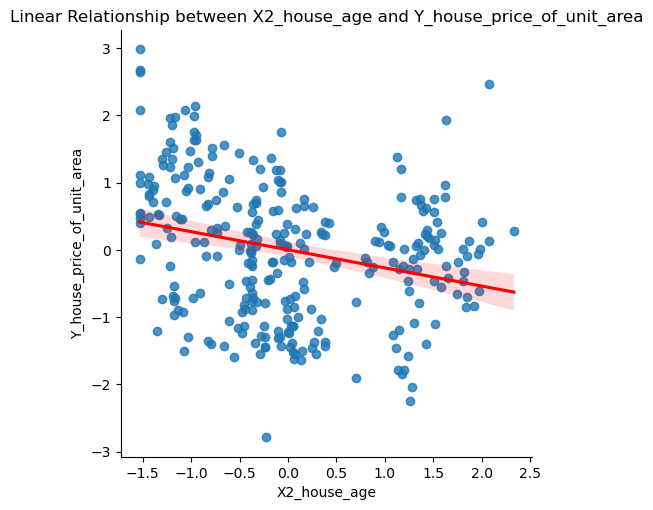

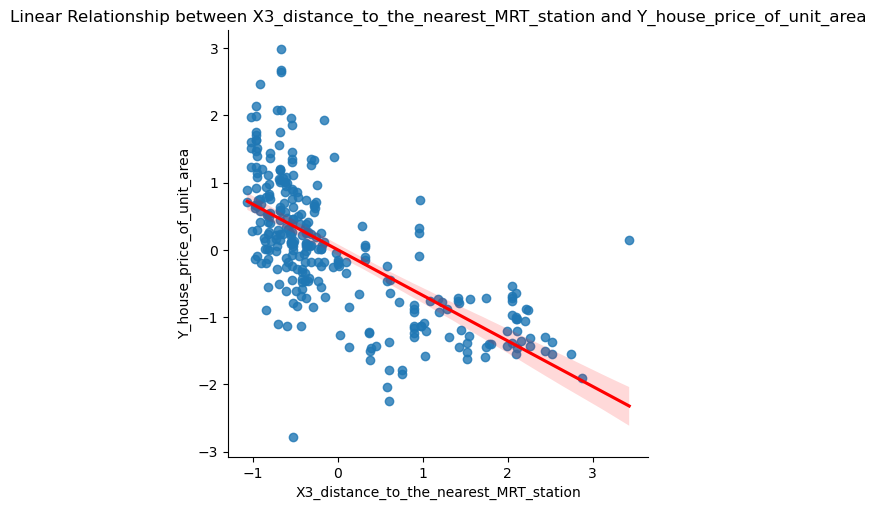

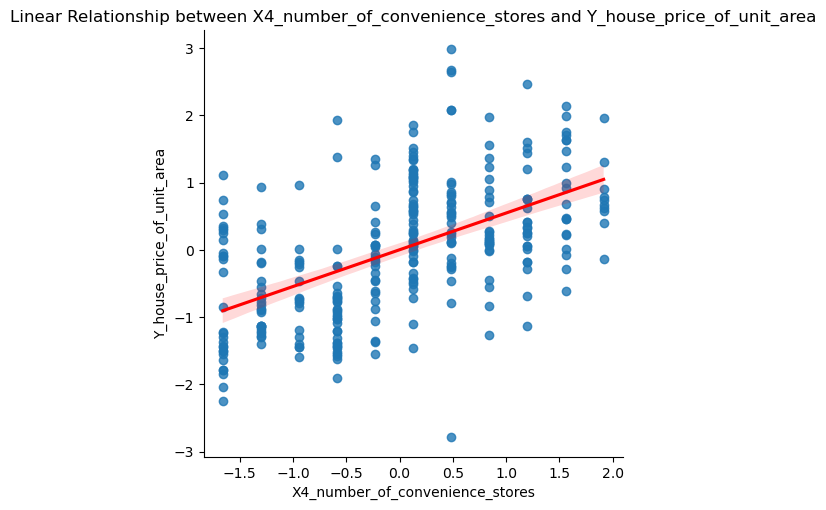

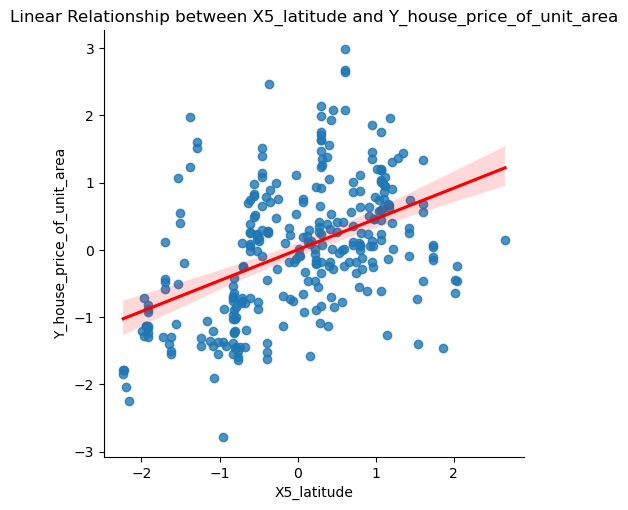

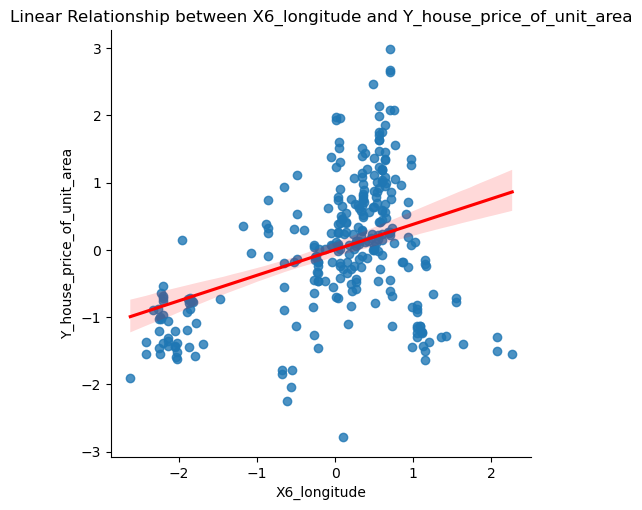

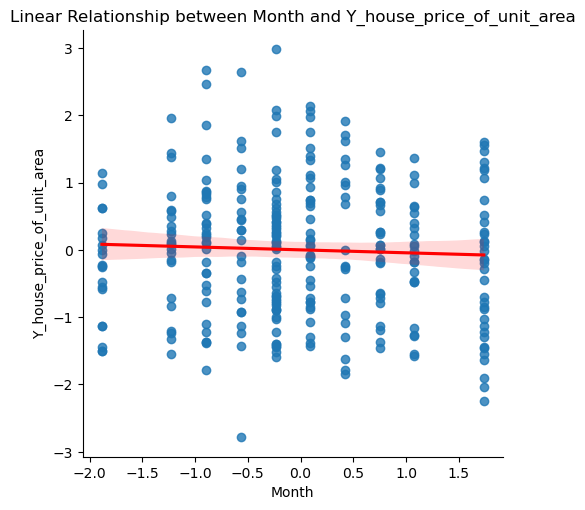

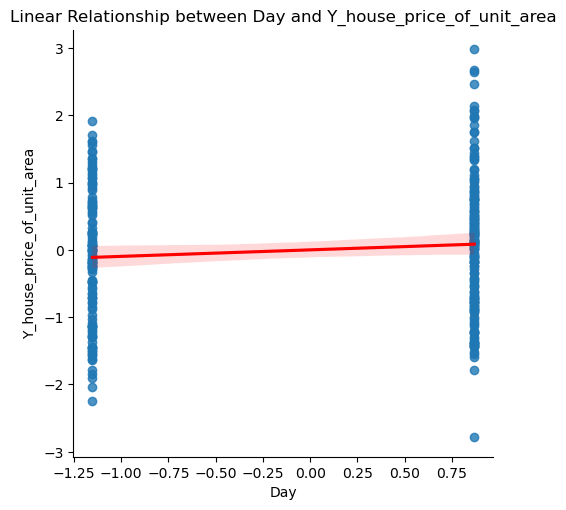

In [38]:
# Plotting the relationship between the independent variables and the dependent variable
for col in df1_scaled.columns:
    if col != 'Y_house_price_of_unit_area':
        sns.lmplot(x=col, y='Y_house_price_of_unit_area', data=df1_scaled, line_kws={'color': 'red'})
        plt.title(f'Linear Relationship between {col} and Y_house_price_of_unit_area')
        plt.show()


#### Observatiosn
- we observe that no strong linearity of Month and day with price, so will drop them.

In [39]:
# Dropping the 'Month' and 'Day' columns
df1_scaled = df1_scaled.drop(columns=['Month', 'Day'])

# Checking the new shape of the DataFrame
print(df1_scaled.shape)

(298, 6)


#### Independence- checking

- will use durbin_watson test which determine if any autocorrelations between values, if result around 2 means no correlation, any value above or less than 2 means a presence of corr.

In [40]:
from statsmodels.stats.stattools import durbin_watson

# let's get the resid which is y - y_pred
y_pred = model.predict(X)
residuals = y - y_pred

# Perform Durbin-Watson test
dw = durbin_watson(residuals)

print(f'Durbin-Watson statistic: {dw}')


Durbin-Watson statistic: 2.0381263107348593


Sounds we have no correlation among residuals.

#### Homoscedasticity - Test



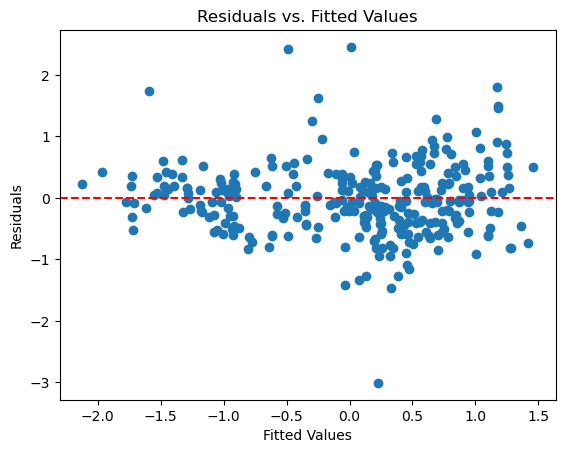

In [41]:
# Plotting residuals vs. fitted values
fitted_vals = model.predict(X)
plt.scatter(fitted_vals, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

Looks like the residuals have constant variance

#### Normality of Residuals - Test
- will use Shapiro test for this task

In [42]:
# Perform the Shapiro test
from scipy.stats import shapiro

p_value = shapiro(residuals)

p_value



ShapiroResult(statistic=0.9536073207855225, pvalue=4.117646668078123e-08)

<Axes: xlabel='Y_house_price_of_unit_area', ylabel='Count'>

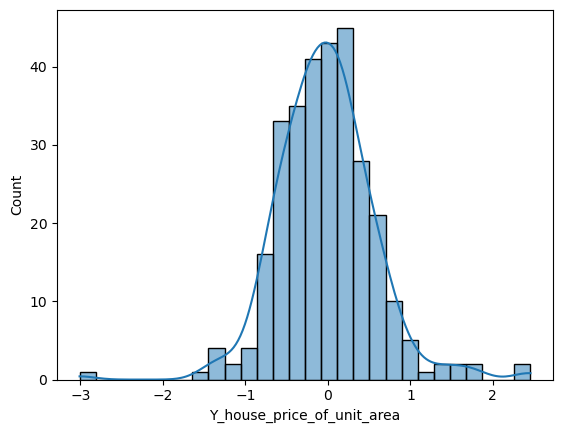

In [43]:
## plotting the residuals
sns.histplot(residuals, kde=True)

#### Oservations:

Since the Shapiro test statistic is close to 1 which indicates that the data is more likely normal distributed, but the p-value is very small which indicate that the resd do not follow normal dist!! -  we can conclude that the residuals is in normal distribution but not perfect one, as the p-value is less than the significance level of 0.05. I believe this may be due to outliers. However, I prefer to proceed with the current model rather than removing more data to treat the outliers, as I'm not certain whether these outliers are genuine or not.

### Multicollinearity - Test
- will use VIF (Variance inflation factor for this task) which results is below 5 means no multicollinearity

In [44]:
## since we droped Month and day from the scaled data
# let's do splitting the data again
X = df1_scaled.drop(columns=['Y_house_price_of_unit_area'])
y = df1_scaled['Y_house_price_of_unit_area']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the new shapes of the training and testing data
print(X_train.shape)
print(X_test.shape)

(238, 5)
(60, 5)


In [45]:
## import VIF from statsmodel 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


                                  feature       VIF
0                            X2_house_age  1.022069
1  X3_distance_to_the_nearest_MRT_station  2.414721
2         X4_number_of_convenience_stores  1.564830
3                             X5_latitude  1.209338
4                            X6_longitude  1.651855


#### Observations:
All the VIF values are below 5, indicating that multicollinearity is not a significant issue in the dataset. Therefore, you do not need to remove any features based on VIF values.

Now all assumptions of Linear regression are met.

### Final Model ( improved)

In [46]:
# Fitting the model
model2 = LinearRegression()
model2.fit(X_train, y_train)

# Predicting the test set results
y_pred2 = model2.predict(X_test)

# Evaluating the model
mae_model2 = mean_absolute_error(y_test, y_pred2)
mse_model2 = mean_squared_error(y_test, y_pred2)
r2_model2 = r2_score(y_test, y_pred2)

print(f"Mean Absolute Error: {mae_model2}")
print(f"Mean Squared Error: {mse_model2}")
print(f"R-squared: {r2_model2}")

Mean Absolute Error: 0.3511701353875232
Mean Squared Error: 0.20086896248025768
R-squared: 0.7268262598207897


#### Let's recap the results of model1
- Mean Absolute Error: 0.35476150495035597
- Mean Squared Error: 0.20357349818983098
- R-squared: 0.7231481996261742

### Final Observations on the Model
The performance of model2 is slightly better than model1 in terms of all three metrics (MAE, MSE, and R-squared). This improvement happend due to removal of the 'Month' and 'Day' columns, which were not showing strong linearity with the price. Therefore, model2 is preferred for its better performance

## 4- Cross-Validation

for this task, i will follow below steps for the solution:

- 1-  run LeaveOneOut Cross-Validation (LOOCV) and report the performance.
- 2-  Perform FiveFold CrossValidation and report the performance.
- 3- Compare the results of the three evaluation methods (Model2 evaluation, LOOCV, and Five-Fold Cross-Validation)


#### 1- (LOOCV) - Leave-One-Out Cross-Validation

In [47]:
from sklearn.model_selection import LeaveOneOut

# will create X,y in numpy arrays
X1_array = X.to_numpy()
y1_array = y.to_numpy().flatten()

# Initialize LOOCV and the model
loo = LeaveOneOut()
model = LinearRegression()

# Lists to store the errors for each iteration
mae_list = []
mse_list = []
rss = 0  # Residual Sum of Squares to claculate the R2 later on

# Perform LOOCV
for train_index, test_index in loo.split(X1_array):
    X_train, X_test = X1_array[train_index], X1_array[test_index]
    y_train, y_test = y1_array[train_index], y1_array[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae_list.append(mean_absolute_error(y_test, y_pred))
    mse_list.append(mean_squared_error(y_test, y_pred))
    rss += (y_test - y_pred) ** 2

# Calculate the average errors
mae_loocv = np.mean(mae_list)
mse_loocv = np.mean(mse_list)

# Total Sum of Squares (TSS)
tss = np.sum((y1_array - np.mean(y1_array)) ** 2)

# Calculate R-squared
r2_loocv = 1 - (rss / tss)

# Print the results
print(f"LOOCV - Mean Absolute Error: {mae_loocv}")
print(f"LOOCV - Mean Squared Error: {mse_loocv}")
print(f"LOOCV - R-squared: {r2_loocv}")



LOOCV - Mean Absolute Error: 0.44259031017962763
LOOCV - Mean Squared Error: 0.3667400898339924
LOOCV - R-squared: [0.63325991]


#### 2- Five-Fold Cross-Validation

In [48]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Prepare data
X2 = df1_scaled.drop(columns='Y_house_price_of_unit_area')
y2 = df1_scaled['Y_house_price_of_unit_area']

# Five-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()

# Calculate cross-validated scores
mae_scores_kfold = cross_val_score(model, X2, y2, cv=kf, scoring='neg_mean_absolute_error')
mse_scores_kfold = cross_val_score(model, X2, y2, cv=kf, scoring='neg_mean_squared_error')
r2_scores_kfold = cross_val_score(model, X2, y2, cv=kf, scoring='r2')

# Calculate mean scores to take the absolute value
mae_kfold = -np.mean(mae_scores_kfold)
mse_kfold = -np.mean(mse_scores_kfold)
r2_kfold = np.mean(r2_scores_kfold)

print(f"K-Fold Cross-Validation (5 folds) - Mean Absolute Error: {mae_kfold}")
print(f"K-Fold Cross-Validation (5 folds) - Mean Squared Error: {mse_kfold}")
print(f"K-Fold Cross-Validation (5 folds) - R-squared: {r2_kfold}")


K-Fold Cross-Validation (5 folds) - Mean Absolute Error: 0.43993602226624795
K-Fold Cross-Validation (5 folds) - Mean Squared Error: 0.3650478542255103
K-Fold Cross-Validation (5 folds) - R-squared: 0.6379570631634659


#### 3 - Comparison:

we collect all the results from intial model up to 5-fold corss validation and present it into a table

In [49]:
from tabulate import tabulate
# create a dictionary of all outputs
metrics = {
    'Evaluation Method': ['Model 1 (Initial)', 'Model 2 (Improved)', 'LOOCV', 'Five-Fold Cross-Validation'],
    'Mean Absolute Error (MAE)': [mae_model1, mae_model2, mae_loocv, mae_kfold],
    'Mean Squared Error (MSE)': [mse_model1, mse_model2, mse_loocv, mse_kfold],
    'R-squared': [r2_model1, r2_model2, r2_loocv, r2_kfold]
}

# Create a DataFrame from the dictionary
df_comparison = pd.DataFrame(metrics)

# print the Data into a table 
print(tabulate(df_comparison, headers='keys', tablefmt='psql')) 


+----+----------------------------+-----------------------------+----------------------------+-------------+
|    | Evaluation Method          |   Mean Absolute Error (MAE) |   Mean Squared Error (MSE) |   R-squared |
|----+----------------------------+-----------------------------+----------------------------+-------------|
|  0 | Model 1 (Initial)          |                    0.354762 |                   0.203573 |    0.723148 |
|  1 | Model 2 (Improved)         |                    0.35117  |                   0.200869 |    0.726826 |
|  2 | LOOCV                      |                    0.44259  |                   0.36674  |    0.63326  |
|  3 | Five-Fold Cross-Validation |                    0.439936 |                   0.365048 |    0.637957 |
+----+----------------------------+-----------------------------+----------------------------+-------------+


## Observation: 

- Model 2 (Improved) shows the best performance with the lowest MAE (0.351170) and MSE (0.200869), and the highest R-squared (0.726826).
- LOOCV and Five-Fold Cross-Validation have higher MAE and MSE values compared to Model 1 and Model 2, indicating a worse fit.
- The R-squared values for LOOCV and Five-Fold Cross-Validation are lower, further indicating these models do not fit as well as the improved Model 2.

## Recommendation:

Model 2 is the best model we have. It's good at predicting the right answer and explaining why.
We could make it even better by trying out different models or adding more information to help it make predictions

## 5- Regularization

i will use below steps to perform regularization task: 
- 1- Fit Lasso (L1) model
- 2- Fit the Ridge (l2) model
- 3- compare the results 

#### 1 - Fit L1 model
- will find the best alpha figure and then fit the model using the kf from previous work

In [50]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LassoCV

# Define a range of alpha values to try
alphas = np.logspace(-4, 0, 50)

# Use LassoCV to find the best alpha value
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv.fit(X2, y2)

# Get the best alpha value
best_alpha_l1 = lasso_cv.alpha_
print(f"Best Lasso alpha: {best_alpha_l1}")



Best Lasso alpha: 0.009102981779915217


In [51]:
# Evaluate the model using cross-validation
mae_scores = cross_val_score(lasso_cv, X2, y2, cv=kf, scoring='neg_mean_absolute_error')
mse_scores = cross_val_score(lasso_cv, X2, y2, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(lasso_cv, X2, y2, cv=kf, scoring='r2')

# Convert scores to positive and calculate mean and standard deviation
mae_mean_l1 = -np.mean(mae_scores)
mse_mean_l1 = -np.mean(mse_scores)
r2_mean_l1 = np.mean(r2_scores)

print(f"Lasso (L1) with K-Fold CV - Mean Absolute Error: {mae_mean_l1}")
print(f"Lasso (L1) with K-Fold CV - Mean Squared Error: {mse_mean_l1}")
print(f"Lasso (L1) with K-Fold CV - R-squared: {r2_mean_l1}")


Lasso (L1) with K-Fold CV - Mean Absolute Error: 0.43886930363013416
Lasso (L1) with K-Fold CV - Mean Squared Error: 0.36411486876084587
Lasso (L1) with K-Fold CV - R-squared: 0.6391803640700856


#### 2 - Fit L2 model
- the same process, will find the best alpha figure and then fit the model using the kf from previous work

In [52]:
from sklearn.linear_model import RidgeCV

In [53]:
# Define a range of alpha values to try
alphas = np.logspace(-4, 0, 50)

# Use RidgeCV to find the best alpha value
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X2, y2)

# Get the best alpha value
best_alpha_l2 = ridge_cv.alpha_
print(f"Best Ridge alpha: {best_alpha_l2}")

mae_scores = cross_val_score(ridge_cv, X2, y2, cv=kf, scoring='neg_mean_absolute_error')
mse_scores = cross_val_score(ridge_cv, X2, y2, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(ridge_cv, X2, y2, cv=kf, scoring='r2')

Best Ridge alpha: 1.0


In [54]:
# Convert scores to positive and calculate mean and standard deviation
mae_mean_l2 = -np.mean(mae_scores)
mse_mean_l2 = -np.mean(mse_scores)
r2_mean_l2 = np.mean(r2_scores)

print(f"Ridge (L2) with K-Fold CV - Mean Absolute Error: {mae_mean_l2}")
print(f"Ridge (L2) with K-Fold CV - Mean Squared Error: {mse_mean_l2}")
print(f"Ridge (L2) with K-Fold CV - R-squared: {r2_mean_l2}")

Ridge (L2) with K-Fold CV - Mean Absolute Error: 0.43974776441490543
Ridge (L2) with K-Fold CV - Mean Squared Error: 0.3649096564535647
Ridge (L2) with K-Fold CV - R-squared: 0.6380940962104251


#### 3- Comparison L1 & l2

both have similar results but l1 slightly better
- Lasso- L1 is slightly better in terms of MAE, MSE, and R-squared and usefull for feature selection

- Ridge - L2 is also a not bad if used to reduce the overfitting

## 6-  Final Comparison and Recommendations

In [55]:
# Create a dictionary of all outputs
metrics = {
    'Evaluation Method': [
        'Model 1 (Initial)', 
        'Model 2 (Improved)', 
        'LOOCV', 
        'Five-Fold Cross-Validation',
        'Lasso (L1) Regularization',
        'Ridge (L2) Regularization'
    ],
    'Mean Absolute Error (MAE)': [
        mae_model1, mae_model2, mae_loocv, mae_kfold, mae_mean_l1, mae_mean_l2
    ],
    'Mean Squared Error (MSE)': [
        mse_model1, mse_model2, mse_loocv, mse_kfold, mse_mean_l1, mse_mean_l2
    ],
    'R-squared': [
        r2_model1, r2_model2, r2_loocv, r2_kfold, r2_mean_l1, r2_mean_l2
    ]
}

# Create a DataFrame from the dictionary
df_comparison = pd.DataFrame(metrics)

# Print the DataFrame as a table
print(tabulate(df_comparison, headers='keys', tablefmt='psql'))

+----+----------------------------+-----------------------------+----------------------------+-------------+
|    | Evaluation Method          |   Mean Absolute Error (MAE) |   Mean Squared Error (MSE) |   R-squared |
|----+----------------------------+-----------------------------+----------------------------+-------------|
|  0 | Model 1 (Initial)          |                    0.354762 |                   0.203573 |    0.723148 |
|  1 | Model 2 (Improved)         |                    0.35117  |                   0.200869 |    0.726826 |
|  2 | LOOCV                      |                    0.44259  |                   0.36674  |    0.63326  |
|  3 | Five-Fold Cross-Validation |                    0.439936 |                   0.365048 |    0.637957 |
|  4 | Lasso (L1) Regularization  |                    0.438869 |                   0.364115 |    0.63918  |
|  5 | Ridge (L2) Regularization  |                    0.439748 |                   0.36491  |    0.638094 |
+----+-------------

### Key observations on the comaprison

- Model 2 (improved one) has the lowest errors and the highest R-squared value among all the methods evaluated. This suggests that the improvements made to the initial model (removing weak linear features)were effective, and this model should be considered as the best performing among the tested models
- Both LOOCV and 5-fold cross-validation have very similar results with slightly higher error metrics (MAE and MSE) and lower R-squared compared to the initial models. This might indicate that the models might be slightly overfitting the training data as their performance is not performing as well to test data.
- Lasso (L1) and Ridge (L2) having very similar results as 5-fold cross validation that might suggest that regularization is helping to prevent overfitting.

## Recommendation and action plan

- Given the results, the improved model (Model 2) is recommended for final use due to its lower prediction errors and better overall performance
- Combining the improved model with insights from cross-validation and regularization techniques, the overall reliability and robustness of predictions can be enhanced for future applications.
- Collecting more data can help preventing overfitting and will enhance the model training.
- I usggest to consider alternative models to check if this linear model are not sufficienT, such as SVM, RF and GB